<a href="https://colab.research.google.com/github/bhavanaseelam/OIBSIP/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`DATA SCIENCE`**

**DEVELOPED BY BHAVANA**

**EMAIL SPAM DETECTION WITH MACHINE LEARNING**

***Set Up Environment***

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn nltk

***Import Libraries***

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

***Data Collection***

In [18]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

Saving spam.csv to spam (5).csv


In [61]:
import pandas as pd

# Try reading the file with ISO-8859-1 encoding
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [62]:
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [63]:
# Rename the columns for clarity
df.columns = ['Label', 'EmailText', 'Col3', 'Col4', 'Col5']

# Drop the unnecessary columns
df = df[['Label', 'EmailText']]

# Display the first few rows to confirm
print(df.head())

  Label                                          EmailText
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


***Data Preprocessing***

In [64]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords and punctuation
    words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['Processed_Text'] = df['EmailText'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


***Feature Extraction***

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Processed_Text']).toarray()
y = df['Label']

***Splitting the Data***

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Model Training***

In [68]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

***Model Evaluation***

Accuracy: 0.9713004484304932
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



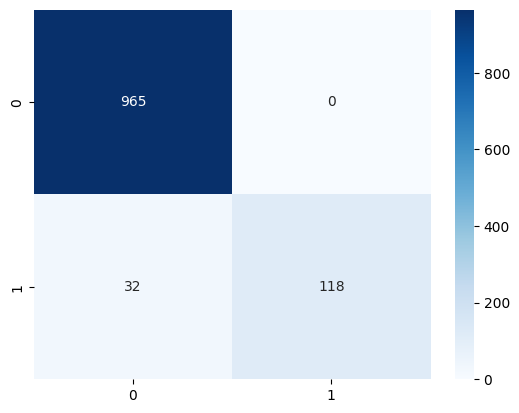

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

***Visualization***

In [70]:
spam_words = ' '.join(df[df['Label'] == 'spam']['EmailText'])
non_spam_words = ' '.join(df[df['Label'] == 'ham']['EmailText'])  # assuming 'ham' represents non-spam

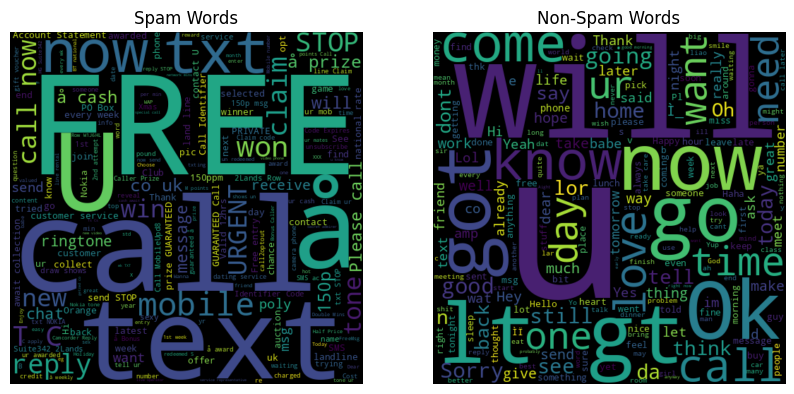

In [71]:
spam_wordcloud = WordCloud(width=500, height=500, random_state=42).generate(spam_words)
non_spam_wordcloud = WordCloud(width=500, height=500, random_state=42).generate(non_spam_words)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Words')

plt.subplot(1, 2, 2)
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Spam Words')

plt.show()

***Bar Plot of Spam vs Non-Spam Emails***

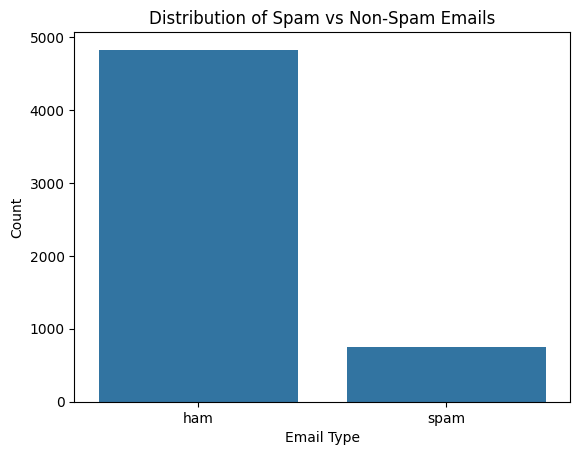

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label', data=df)
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

***Length of Emails (Histogram)***

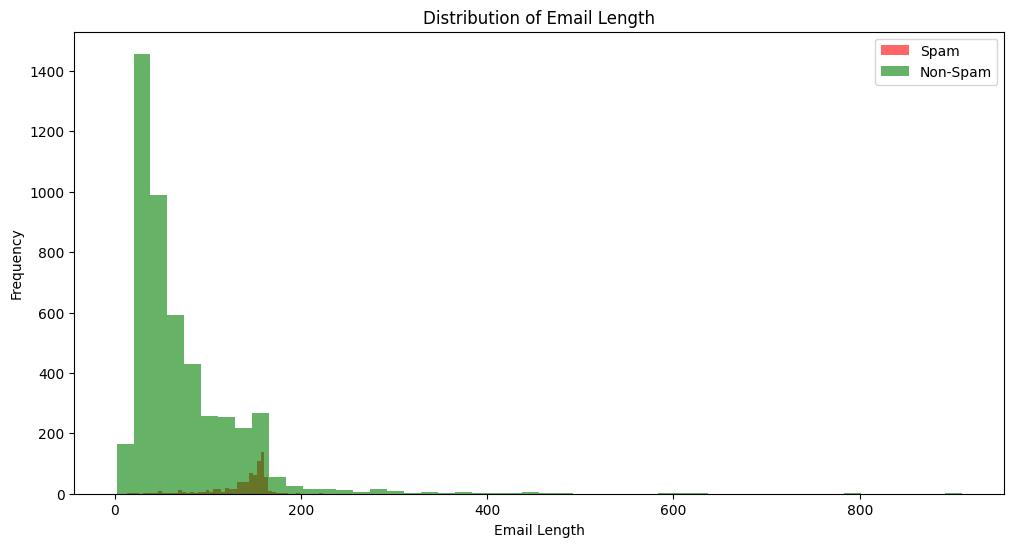

In [73]:
df['EmailLength'] = df['EmailText'].apply(len)

plt.figure(figsize=(12, 6))
df[df['Label'] == 'spam']['EmailLength'].plot(kind='hist', bins=50, color='red', alpha=0.6, label='Spam')
df[df['Label'] == 'ham']['EmailLength'].plot(kind='hist', bins=50, color='green', alpha=0.6, label='Non-Spam')
plt.title('Distribution of Email Length')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

***Correlation Heatmap***

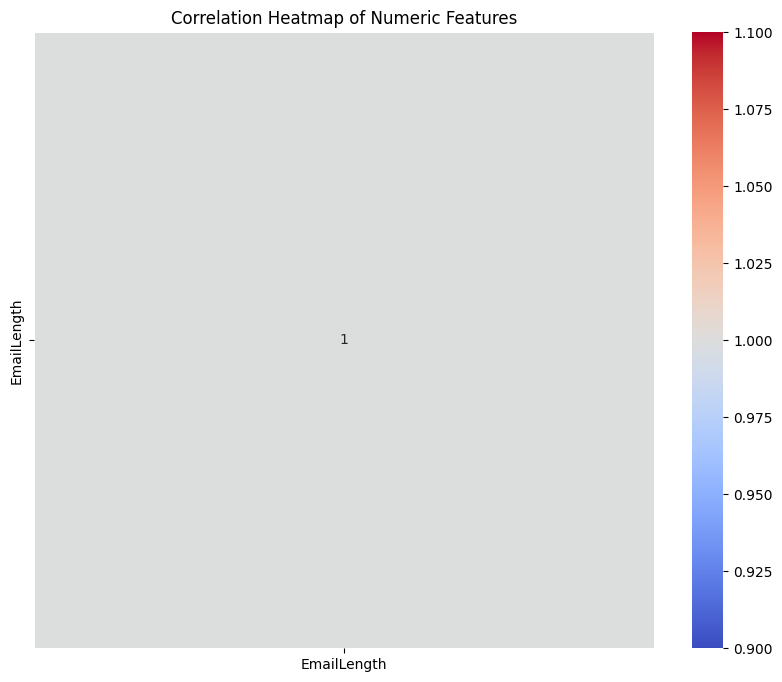

In [74]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

***Confusion Matrix for Model Evaluation***

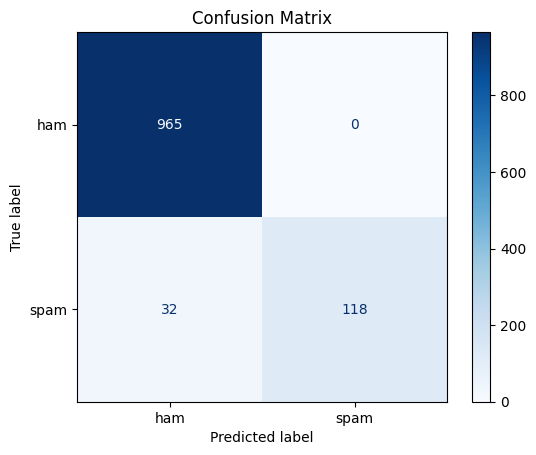

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

***Precision-Recall Curve***

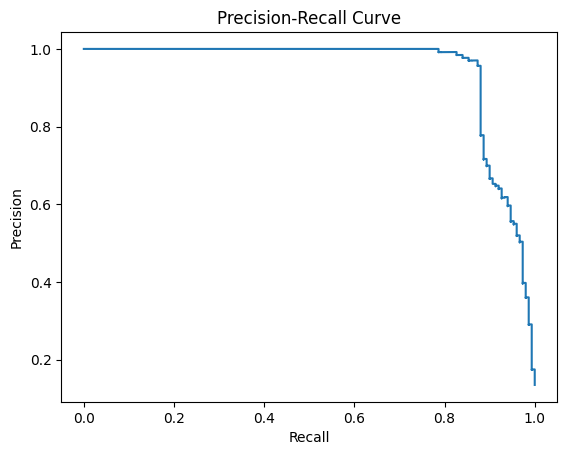

In [76]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

y_scores = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores, pos_label='spam')

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()

***Check for Missing Values***

In [77]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Label             0
EmailText         0
Processed_Text    0
EmailLength       0
dtype: int64



Spam vs. Ham:
Label
ham     4825
spam     747
Name: count, dtype: int64


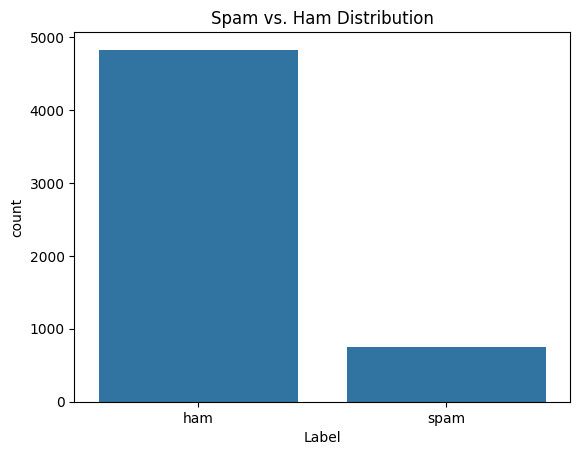

In [80]:
# Count the number of spam and ham messages
spam_count = df['Label'].value_counts()
print(f"\nSpam vs. Ham:\n{spam_count}")

# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Label', data=df)
plt.title('Spam vs. Ham Distribution')
plt.show()


Average EmailText Length:
 Label
ham      71.023627
spam    138.866131
Name: EmailText_length, dtype: float64


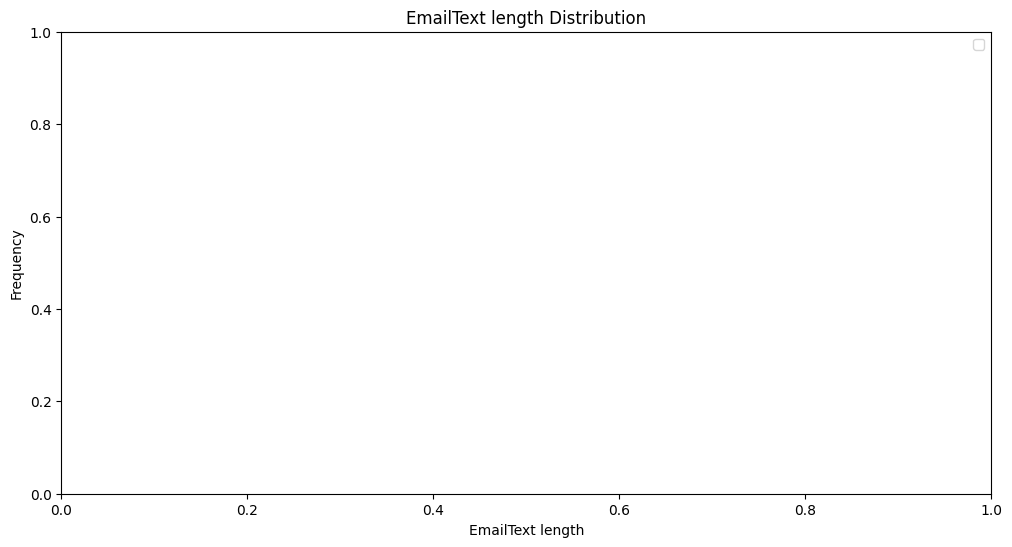

In [86]:
# Add a new column for message length
df['EmailText_length'] = df['EmailText'].apply(len)

# Get the average message length for spam and ham
print("\nAverage EmailText Length:\n", df.groupby('Label')['EmailText_length'].mean())

# Visualize the distribution of message lengths
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Label'] == 0]['EmailText_length'], bins=50, color='green', Label='Ham', kde=True)
sns.histplot(df[df['Label'] == 1]['EmailText_length'], bins=50, color='red', Label='Spam', kde=True)
plt.title('EmailText length Distribution')
plt.xlabel('EmailText length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

***Saving the MOdel***

In [90]:
import pickle

# Save the model
with open('spam_detector.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)